In [1]:
import pandas as pd 

In [2]:
#Reading the datasets and giving column names according to readme file

#Movies data
columns_m = ["Movie ID", "Title", "Genres"]

movies = pd.read_csv("ml-1m/movies.dat", sep="::", names=columns_m,engine="python", encoding="ISO-8859-1")

In [3]:
movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#Ratings data
columns_r = ["User ID", "Movie ID", "Rating", "Timestamp"]

ratings = pd.read_csv("ml-1m/ratings.dat", sep = "::", names = columns_r, engine="python", encoding = "ISO-8859-1")

In [5]:
ratings.head()

,User ID,Movie ID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
#Users data
columns_u = ["User ID", "Gender", "Age", "Occupation", "Zip-Code"]

users = pd.read_csv("ml-1m/users.dat", sep="::", names=columns_u, engine="python", encoding="ISO-8859-1")

In [7]:
users.head()

,User ID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
#Basic analysis
movies.dtypes

Movie ID     int64
Title       object
Genres      object
dtype: object

In [9]:
ratings.dtypes

User ID      int64
Movie ID     int64
Rating       int64
Timestamp    int64
dtype: object

In [10]:
users.dtypes

User ID        int64
Gender        object
Age            int64
Occupation     int64
Zip-Code      object
dtype: object

In [11]:
#Shape of the data sets
#3 columns 3883 rows
#3 features
movies.shape

(3883, 3)

In [12]:
#4 columns 1000209 rows
#4 features
ratings.shape

(1000209, 4)

In [13]:
#5 columns 6040
#4 features
users.shape

(6040, 5)

In [14]:
#Looking for null values
movies.isna().sum() #No null values

Movie ID    0
Title       0
Genres      0
dtype: int64

In [15]:
ratings.isna().sum() #No null values

User ID      0
Movie ID     0
Rating       0
Timestamp    0
dtype: int64

In [16]:
users.isna().sum() #No null values

User ID       0
Gender        0
Age           0
Occupation    0
Zip-Code      0
dtype: int64

In [17]:
#All genres that is in dataset
all_genres = movies["Genres"].str.split("|").explode() #Explode function splits lists to new rows

unique_genres = all_genres.unique()

genres = list(unique_genres)

print(genres)

['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']


In [18]:
#There are 18 genres in dataset
len(genres)

18

In [19]:
#Changing the numbers of occupation column to real names of jobs

jobs = {
    0:  "Other",
	1:  "Academic/Educator",
	2:  "Artist",
	3:  "Clerical/Admin",
	4:  "College/Grad Student",
	5:  "Customer Service",
	6:  "Doctor/Health Care",
	7:  "Executive/Managerial",
	8:  "Farmer",
	9:  "Homemaker",
	10:  "K-12 Student",
	11:  "Lawyer",
	12:  "Programmer",
	13:  "Retired",
	14:  "Sales/Marketing",
	15:  "Scientist",
	16:  "Self-Employed",
	17:  "Technician/Engineer",
	18:  "Tradesman/Craftsman",
	19:  "Unemployed",
	20:  "Writer"
}

users["Occupation"] = users["Occupation"].map(jobs)

In [20]:
users.head()

,User ID,Gender,Age,Occupation,Zip-Code
0,1,F,1,K-12 Student,48067
1,2,M,56,Self-Employed,70072
2,3,M,25,Scientist,55117
3,4,M,45,Executive/Managerial,02460
4,5,M,25,Writer,55455


In [21]:
#Converting F to Female and M to Male just to make it more understandable

gender = {
    "F" : "Female",
    "M" : "Male"
}

users["Gender"] = users["Gender"].map(gender)

In [22]:
users.head()

,User ID,Gender,Age,Occupation,Zip-Code
0,1,Female,1,K-12 Student,48067
1,2,Male,56,Self-Employed,70072
2,3,Male,25,Scientist,55117
3,4,Male,45,Executive/Managerial,02460
4,5,Male,25,Writer,55455


In [23]:
#Number of Male and Female users
users["Gender"].value_counts()

Gender
Male      4331
Female    1709
Name: count, dtype: int64

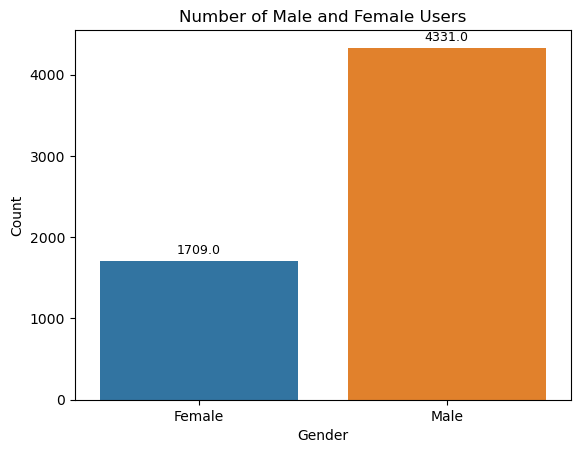

In [24]:
#Some basic visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#Male Female Chart
plt.title("Number of Male and Female Users")
plt.ylabel("Count")


ax = sns.countplot(x="Gender", data=users, hue="Gender")

#To show numbers 
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=9,color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.show()

In [25]:
#Number of genres 
movies["Genres"] = movies["Genres"].str.split("|")

movies_exploded = movies.explode("Genres")

genre_counts = movies_exploded["Genres"].value_counts()

In [26]:
print(genre_counts)

Genres
Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
Name: count, dtype: int64


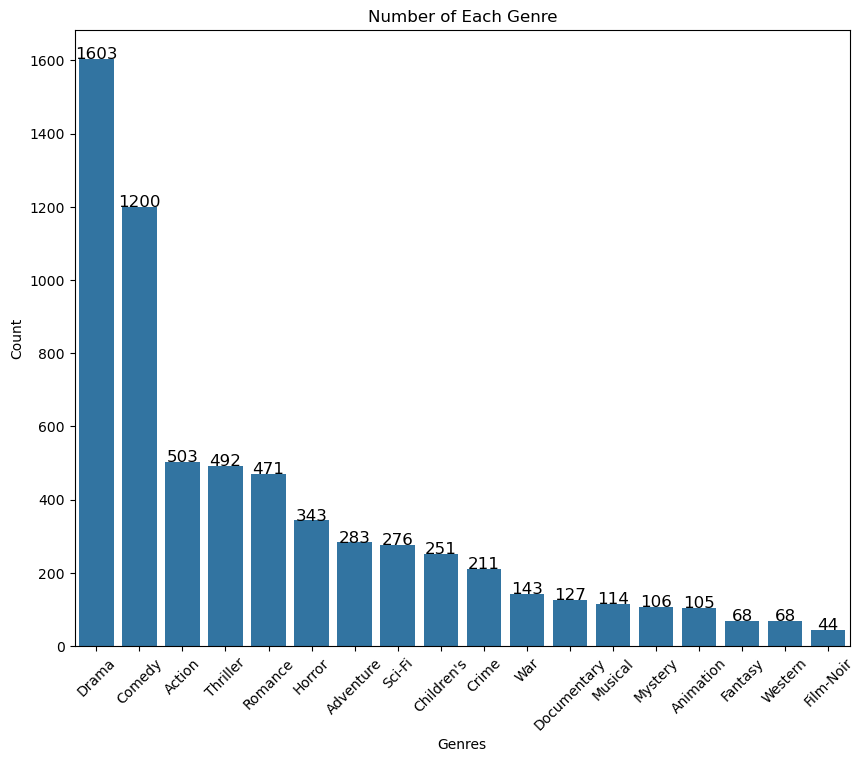

In [27]:
#Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title("Number of Each Genre")
plt.ylabel("Count")
plt.xlabel("Genres")
plt.xticks(rotation =45)

#Shows the numbers
for i, v in enumerate(genre_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

plt.show()

In [28]:
#A calculation for top 10 film

average_ratings = ratings.groupby("Movie ID")["Rating"].mean().reset_index()
average_ratings = average_ratings.rename(columns={"Rating" : "Average Rating"})

In [29]:
average_ratings

,Movie ID,Average Rating
0,1,4.146846
1,2,3.201141
2,3,3.016736
3,4,2.729412
4,5,3.006757
...,...,...
3701,3948,3.635731
3702,3949,4.115132
3703,3950,3.666667
3704,3951,3.900000


In [30]:
#Movies names and ratings
movies_ratings = pd.merge(movies, average_ratings, on="Movie ID")

In [31]:
#Top 10 movies
top_10_movies = movies_ratings.sort_values(by="Average Rating", ascending=False).head(10)

In [32]:
top_10_movies

,Movie ID,Title,Genres,Average Rating
926,989,Schlafes Bruder (Brother of Sleep) (1995),[Drama],5.0
3635,3881,Bittersweet Motel (2000),[Documentary],5.0
1652,1830,Follow the Bitch (1998),[Comedy],5.0
3152,3382,Song of Freedom (1936),[Drama],5.0
744,787,"Gate of Heavenly Peace, The (1995)",[Documentary],5.0
3054,3280,"Baby, The (1973)",[Horror],5.0
3367,3607,One Little Indian (1973),"[Comedy, Drama, Western]",5.0
3010,3233,Smashing Time (1967),[Comedy],5.0
2955,3172,Ulysses (Ulisse) (1954),[Adventure],5.0
3414,3656,Lured (1947),[Crime],5.0


In [33]:
top_10_movie_titles = top_10_movies['Title'].tolist()

In [34]:
top_10_movie_titles

['Schlafes Bruder (Brother of Sleep) (1995)',
 'Bittersweet Motel (2000)',
 'Follow the Bitch (1998)',
 'Song of Freedom (1936)',
 'Gate of Heavenly Peace, The (1995)',
 'Baby, The (1973)',
 'One Little Indian (1973)',
 'Smashing Time (1967)',
 'Ulysses (Ulisse) (1954)',
 'Lured (1947)']

In [35]:
#Last 10 movies
last_10 = movies_ratings.sort_values(by="Average Rating", ascending=False).tail(10)

In [36]:
last_10

,Movie ID,Title,Genres,Average Rating
1287,1386,Terror in a Texas Town (1958),[Western],1.0
1326,1430,Underworld (1997),[Thriller],1.0
1062,1142,Get Over It (1996),[Drama],1.0
1078,1165,"Bloody Child, The (1996)","[Drama, Thriller]",1.0
3013,3237,Kestrel's Eye (Falkens öga) (1998),[Documentary],1.0
774,826,Diebinnen (1995),[Drama],1.0
3006,3228,Wirey Spindell (1999),[Comedy],1.0
2638,2845,White Boys (1999),[Drama],1.0
2989,3209,"Loves of Carmen, The (1948)",[Drama],1.0
137,142,Shadows (Cienie) (1988),[Drama],1.0


In [37]:
last_10_list = last_10["Title"].tolist()

In [38]:
last_10_list

['Terror in a Texas Town (1958)',
 'Underworld (1997)',
 'Get Over It (1996)',
 'Bloody Child, The (1996)',
 "Kestrel's Eye (Falkens öga) (1998)",
 'Diebinnen (1995)',
 'Wirey Spindell (1999)',
 'White Boys (1999)',
 'Loves of Carmen, The (1948)',
 'Shadows (Cienie) (1988)']

In [39]:
users = users.sort_values(by="Age",ascending=True)

In [40]:
#Changing age column
age = {
    1:  "Under 18",
	18 :  "18-24",
	25:  "25-34",
	35:  "35-44",
	45:  "45-49",
	50:  "50-55",
	56:  "56+"}

users["Age"] = users["Age"].map(age)

In [41]:
users.head()

,User ID,Gender,Age,Occupation,Zip-Code
0,1,Female,Under 18,K-12 Student,48067
5175,5176,Male,Under 18,K-12 Student,60423
5172,5173,Male,Under 18,K-12 Student,60423
2107,2108,Male,Under 18,K-12 Student,60462
3297,3298,Male,Under 18,K-12 Student,20876


In [42]:
users["Age"].value_counts()

Age
25-34       2096
35-44       1193
18-24       1103
45-49        550
50-55        496
56+          380
Under 18     222
Name: count, dtype: int64

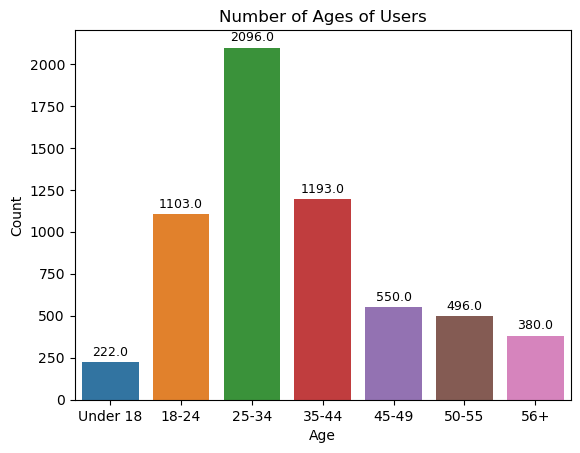

In [43]:
#Plot for age

plt.title("Number of Ages of Users")
plt.ylabel("Count")
ax = sns.countplot(x = users["Age"], hue="Age", data=users)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=9,color='black', xytext=(0, 5), 
                textcoords='offset points')

How can we enrich the data?
1 - Countries of individuals (explicit)
2 - Movie cast, director (explicit)
3 - On which days and at which times (implicit)
4 - On which devices it tracks (implicit)
5 - Monitoring time (implicit)
6 - Monitoring frequency (implicit)

In [44]:
#Merge users and ratings data 

merged_data = pd.merge(users,ratings, on="User ID")

In [45]:
#Female and Male data

female_data = merged_data[merged_data["Gender"] == "Female"]

male_data = merged_data[merged_data["Gender"] == "Male"]

In [63]:
len(male_data), len(female_data)

(753769, 246440)

In [47]:
#inter file
inter_male = male_data[["User ID", "Movie ID", "Rating", "Timestamp"]]

inter_male.columns = ["user_id:token","item_id:token","rating:float","timestamp:float"]

In [48]:
inter_female = female_data[["User ID", "Movie ID", "Rating", "Timestamp"]]

inter_female.columns = ["user_id:token","item_id:token","rating:float","timestamp:float"]

In [49]:
inter_male.to_csv("./dataset/male/male.inter", sep="\t", index=False)

In [50]:
inter_female.to_csv("./dataset/female/female.inter", sep="\t", index=False)

In [51]:
#item file
item = pd.read_csv("ml-1m/movies.dat", sep="::", names=columns_m,encoding="ISO-8859-1", engine="python")

item["Genres"] = item["Genres"].apply(lambda x :  x.replace("|", " "))

item['release_year'] = item['Title'].str.extract(r'\((\d{4})\)')

item['Title'] = item['Title'].apply(lambda x: x[:-6].strip())

In [52]:
item.head(5)

,Movie ID,Title,Genres,release_year
0,1,Toy Story,Animation Children's Comedy,1995
1,2,Jumanji,Adventure Children's Fantasy,1995
2,3,Grumpier Old Men,Comedy Romance,1995
3,4,Waiting to Exhale,Comedy Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [53]:
item.columns = ["item_id:token","movie_title:token_seq","release_year:token","genre:token_seq"]

In [54]:
item.to_csv("./dataset/male/male.item", sep="\t", index=False)

item.to_csv("./dataset/female/female.item", sep="\t", index=False)

In [55]:
#User file
columns_u = ["User ID", "Gender", "Age", "Occupation", "Zip-Code"]

users = pd.read_csv("ml-1m/users.dat", sep="::", names=columns_u, engine="python", encoding="ISO-8859-1")

In [56]:
users.head()

,User ID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [57]:
female = users[users["Gender"] == "F"]

male = users[users["Gender"] == "M"]

female.columns = ["user_id:token","age:token","gender:token","occupation:token","zip_code:token"]

male.columns = ["user_id:token","age:token","gender:token","occupation:token","zip_code:token"]

In [58]:
female.to_csv("./dataset/female/female.user", sep="\t", index=False)

male.to_csv("./dataset/male/male.user", sep="\t", index=False)

In [59]:
#Import Recbole
from recbole.quick_start import run_recbole

config_dict = {
    "dataset": "female",
    "data_path": "./dataset",
}

run_recbole(model='BPR', config_dict=config_dict, config_file_list = ["config.yaml"])

24 Sep 13:46    INFO  ['c:\\Users\\omerf\\anaconda3\\envs\\recbole_env\\lib\\site-packages\\ipykernel_launcher.py', '--f=c:\\Users\\omerf\\AppData\\Roaming\\jupyter\\runtime\\kernel-v3cf33f4caf53ef36067d0b4e5bc6bd67a8ec64ebb.json']
24 Sep 13:46    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = True
data_path = ./dataset\female
checkpoint_dir = saved
show_progress = True
save_dataset = False
dataset_save_path = None
save_dataloaders = False
dataloaders_save_path = None
log_wandb = False

Training Hyper Parameters:
epochs = 500
train_batch_size = 4096
learner = adam
learning_rate = 0.001
train_neg_sample_args = {'distribution': 'uniform', 'sample_num': 1, 'alpha': 1.0, 'dynamic': False, 'candidate_num': 0}
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_args = {'split': {'RS': [0.8, 0.1, 0.1]}, 'order': 'RO', 'group_by': 'user', 'mode': {'valid': 'ful

{'best_valid_score': 0.3314,
 'valid_score_bigger': True,
 'best_valid_result': OrderedDict([('recall@10', 0.1344),
              ('mrr@10', 0.3314),
              ('ndcg@10', 0.1763),
              ('hit@10', 0.6641),
              ('precision@10', 0.1355)]),
 'test_result': OrderedDict([('recall@10', 0.1401),
              ('mrr@10', 0.3695),
              ('ndcg@10', 0.2031),
              ('hit@10', 0.6688),
              ('precision@10', 0.1563)])}

In [60]:
from recbole.quick_start import run_recbole

config_dict = {
    "dataset": "male",
    "data_path": "./dataset/",
}

run_recbole(model='BPR', config_dict=config_dict, config_file_list = ["config.yaml"])

24 Sep 13:48    INFO  ['c:\\Users\\omerf\\anaconda3\\envs\\recbole_env\\lib\\site-packages\\ipykernel_launcher.py', '--f=c:\\Users\\omerf\\AppData\\Roaming\\jupyter\\runtime\\kernel-v3cf33f4caf53ef36067d0b4e5bc6bd67a8ec64ebb.json']
24 Sep 13:48    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020


state = INFO
reproducibility = True
data_path = ./dataset/male
checkpoint_dir = saved
show_progress = True
save_dataset = False
dataset_save_path = None
save_dataloaders = False
dataloaders_save_path = None
log_wandb = False

Training Hyper Parameters:
epochs = 500
train_batch_size = 4096
learner = adam
learning_rate = 0.001
train_neg_sample_args = {'distribution': 'uniform', 'sample_num': 1, 'alpha': 1.0, 'dynamic': False, 'candidate_num': 0}
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_args = {'split': {'RS': [0.8, 0.1, 0.1]}, 'order': 'RO', 'group_by': 'user', 'mode': {'valid': 'full', 'test': 'full'}}
repeatable = False
metrics = ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision']
topk = [10]
valid_metric = MRR@10
valid_metric_bigger = True
eval_batch_size = 4096
metric_decimal_place = 4

Dataset Hyper Parameters:
field_separator = 	
seq_separator =  
USER_ID_FIELD = user_id
ITEM_ID_FIELD = item_id
RA

{'best_valid_score': 0.3856,
 'valid_score_bigger': True,
 'best_valid_result': OrderedDict([('recall@10', 0.1437),
              ('mrr@10', 0.3856),
              ('ndcg@10', 0.21),
              ('hit@10', 0.7301),
              ('precision@10', 0.1679)]),
 'test_result': OrderedDict([('recall@10', 0.1661),
              ('mrr@10', 0.4645),
              ('ndcg@10', 0.2685),
              ('hit@10', 0.7645),
              ('precision@10', 0.2128)])}

In [61]:
#Male and Female Results

male_results = {
    'recall@10': 0.1661,
    'mrr@10': 0.4645,
    'ndcg@10': 0.2685,
    'hit@10': 0.7645,
    'precision@10': 0.2128
}

female_results = {
    'recall@10': 0.1401,
    'mrr@10': 0.3695,
    'ndcg@10': 0.2031,
    'hit@10': 0.6688,
    'precision@10': 0.1563
}



Paper : https://dl.acm.org/doi/pdf/10.1145/3269206.3271795

In [62]:
#I am using MAD (Mean absolute difference). I examined a paper and found this

#Calculating MAD
male_mean = (0.1661 + 0.4645 + 0.2685 + 0.7645 + 0.2128)
female_mean = (0.1401 + 0.3695 + 0.2031 + 0.6688 + 0.1563)
#Result
abs(male_mean-female_mean) / 5

0.06772